<a href="https://colab.research.google.com/github/Karansaini260/Intel-Image-Classification/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel Image Classification

In this project we will be working on the intel image i.e. images of buildings,forest,street,etc.We will build a convolutuinal neural network and train it on this images. This is a multi class classification problem and we will use keras.

In [ ]:
# load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization
drive.mount('/content/drive')

Mounted at /content/drive


First we will mount our google drive on colab so that we can use the dataset directly from our drive.For this you first need to upload the data on your drive and then mount the drive on colab.

In [ ]:
#After executing the cell above, Drive files will be present in '/content/drive/My Drive'.
!ls "/content/drive/My Drive"

'ABC123, XYZ001'
'Activation Functions in Machine Learning.gdoc'
'App Script.txt'
'Backpropagation: Explained.gdoc'
'Bird Speciees Dataset'
'Colab Notebooks'
 CreditCardFraud.ipynb
 Data.gsheet
'Data Science Cheat Sheet PDF Download.pdf'
'Drive Creator.gsheet'
'Drive Creator - Sheet1.csv'
'Gradient Descent in Machine Learning.gdoc'
 IMG_20240827_195202.jpg
'instagram_profiles_sample - Instagram.csv'
'instagram_profiles_sample - Instagram.gsheet'
'Intel Image Dataset'
'interview ques(DS (1).gdoc'
'interview ques(DS.gdoc'
 jsconfig.json
'Karan saini resume.pdf'
 next.config.mjs
 output.csv
 package.json
 package-lock.json
 postcss.config.js
 Potato___Early_blight
 public
'PW TASK.ipynb'
'python JD (1).rtf.gdoc'
'python JD.rtf.gdoc'
 PYTHONJDTBI.rtf.gdoc
'PyTorch Notes and Keyword Explanations.gdoc'
 README.md
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
'Resume (4).gdoc'
'Resume (5).gdoc'
 Resume.gdoc
'Resume update.pdf'
 src
 tailwind.config.js
'Untitled spreadsheet.gsheet'
 ut

After mounting our drive we will locate the folder where our data is stored to use it in our colab notebook.Here we will see all the folders I have in my drive and 'Intel image Dataset' contains the images that we will work on.

In [ ]:
# Importing imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import array_to_img , img_to_array
from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,LeakyReLU
from keras.layers import BatchNormalization

We will start by importing some required libraries

In [ ]:
# Listing directory
!ls "/content/drive/My Drive/Intel Image Dataset"

buildings  forest  glacier  mountain  sea  street


We will check for folder of class images.

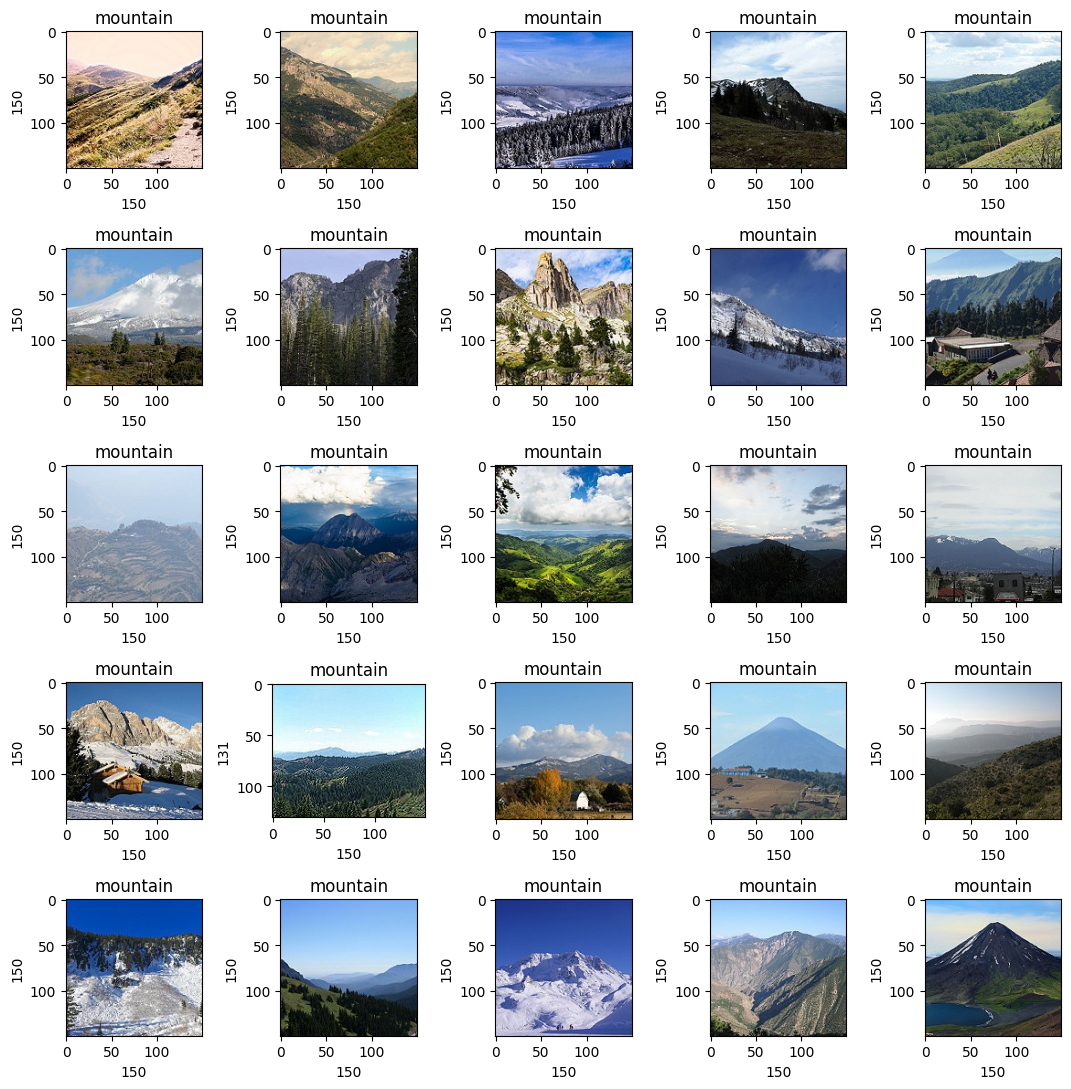

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(11,11))
path = "/content/drive/My Drive/Intel Image Dataset/mountain/"
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.tight_layout()
  rand_img = imread(path + random.choice(listdir(path)))
  plt.imshow(rand_img)
  plt.title('mountain')
  plt.xlabel(rand_img.shape[1],fontsize=10)
  plt.ylabel(rand_img.shape[0],fontsize=10)

Let's visualize some of the mountain images that we will be working on.Aloso we will observe x and y dimensions of the image.

In [ ]:
dir = "/content/drive/My Drive/Intel Image Dataset"
root_dir = listdir(dir)
image_list , label_list = [],[]

Setting the root directory for the dataset and storing all the folders name of the dataset.We will also create 2 empty list for image and labels.

In [ ]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150))
    image = np.array(image)
    image_list.append(image)
    label_list.append(directory)

Next we need to realize image as some of the images don't have same dimensions.So,we will read and resize all the images.Then we will convert it into array and appending the list created above with the image and its label.

In [ ]:
# Visualize the number of classes counts
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

,count
0,
glacier,553
mountain,525
sea,510
street,501
forest,474
buildings,437


Checking for images per class

In [ ]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

Storing the number of classes which will be used further in model architecture.

In [ ]:
# Checking x data Shape
np.array(image_list).shape

(3000, 150, 150, 3)

Checking the shape of the x data for input layer of model architecture

In [ ]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(3000,)

Checking the number of labels in y data which should be equal to total number of images.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=10)

Now we will split our dataset into testing using train_test_split() from sklearn.

In [ ]:
x_train = np.array(x_train,dtype=np.float16) / 225.0
x_test = np.array(x_test,dtype=np.float16) / 225.0
x_train = x_train.reshape(-1,150,150,3)
x_test = x_test.reshape(-1,150,150,3)

Next we will normalize the images by dividing them with 225 and we will also reshape x_train and x_test data

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Here we will use label binarizer to one hot encode our y data. We will also print the sequence of the classes.

In [ ]:
# Splitting the training data set into training and validation data set
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2)

Now we will split the training data to validation and training data.

In [ ]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),

        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),

        Dense(6, activation = 'softmax')
        ])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 148, 148, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 146, 146, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 146, 146, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 27, 27, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │             

 Total params: 306,422 (1.17 MB)

 Trainable params: 305,718 (1.17 MB)

 Non-trainable params: 704 (2.75 KB)

Now we will create a network architecture for the model.We have used different types of layers according to their features namely BatchNormalization (Batch Normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch).leakyReLU (The Leaky ReLU modifies the function to allow small negative values when the input is less than zero.),Conv_2D (It is used to create a convulational kernel that is convolved with the input layer to produce the output tensor),max_pooling2d ( it is a downsampling technique which takes out the maximum value over the window defined by poolsize),flatten ( It flatten the input and creates a 1D output),Dense (Dense layer produce the output as the dot product of the input and kernel).In the last layer we will use softmax as the activation function because it is a multi class classification problem.

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(0.0005),metrics = ['accuracy'])

For compiling the model we need to pass 3 parameters namely loss, optimizer and metrics.Here we will use loss as categorical_crossentropy,optimizer as Adam and metrics as accuracy.

In [ ]:
# Training the model
epochs =70
batch_size = 32
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.3660 - loss: 1.6143 - val_accuracy: 0.1750 - val_loss: 2.0901
Epoch 2/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5808 - loss: 1.0947 - val_accuracy: 0.1667 - val_loss: 2.3609
Epoch 3/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6659 - loss: 0.9344 - val_accuracy: 0.1688 - val_loss: 2.4397
Epoch 4/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6625 - loss: 0.9003 - val_accuracy: 0.1688 - val_loss: 2.2476
Epoch 5/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7309 - loss: 0.7582 - val_accuracy: 0.4667 - val_loss: 1.3447
Epoch 6/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7546 - loss: 0.7252 - val_accuracy: 0.5188 - val_loss: 1.2525
Epoch 7/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7716 - loss: 0.6963 - val_accuracy: 0.6729 - val_loss: 0.9049
Epoch 8/70
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7928 - loss: 0.6209 - val_accuracy: 0.7188 - 

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning.Now we will train our model in 70 epochs and batch size of 128.You can try using more number of epochs to increase accuracy.During each epoch we can see how the model is performing by viewing the training and validation accuracy.



In [ ]:
model.save("/content/drive/My Drive/intel_image.h5")

We will save the model using model.save() to use it later for predictions.

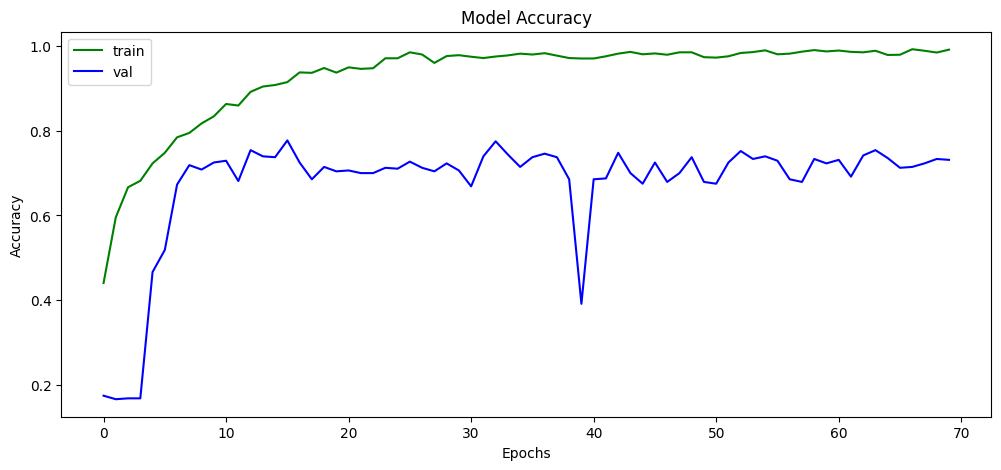

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train','val'])
plt.show()
#

Next we will plot the accuracy of the model for the training history.

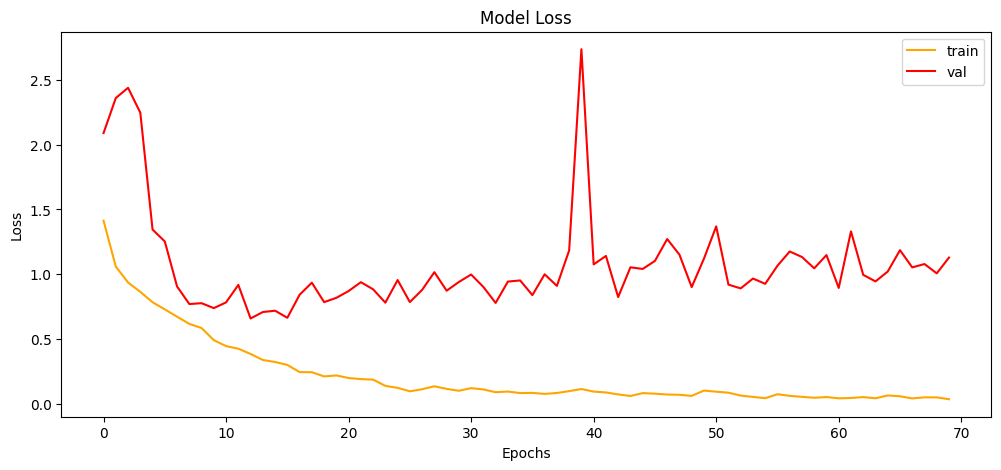

In [ ]:
# Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='orange', label='Training Loss')
plt.plot(history.history['val_loss'], color='red', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','val'])
plt.show()
#

Next we will plot the loss of the model for the training history.

In [ ]:
score = model.evaluate(x_test,y_test)
print('Test Accuracy : {}'.format(score[1]*100))

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7225 - loss: 1.0534
Test Accuracy : 74.50000047683716


Evaluating the model to know the accuracy of the model on the test data.

In [ ]:
y_pred = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


Generating predictions for test data and storing them into y_pred

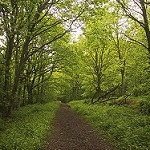

In [ ]:
#Plotting image to compare
img = array_to_img(x_test[1])
img

Visualizing an image to be predicted in further steps.

In [ ]:
# Finding max value from prediction list and comparing value vs predicted
labels = lb.classes_
print(labels)
print(y_pred[1])
print(y_test[1])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
[1.0228318e-06 9.9996650e-01 8.7457707e-08 1.0748345e-05 1.5707745e-05
 5.8542437e-06]
[0 1 0 0 0 0]


Now, we will create a list of object of label binarizer.We will print that list and finally we will print out the prediction and the original label of the image we visualized above using argmax().

# Conclusion:

In this project we saw how we can create a CNN using different layers. Normalizing is an important step when working with any type of dataset.We will use this model to predict the class of the image supplied to the model.

# Scope:

The project has a vast scope.It can be used to classify satellite images,drone images,google images into different classes like sea,mountain etc.